In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import normaltest
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
def read_data(filepath, num_independent_variable):
  columns = []
  for i in range(1, num_independent_variable+1):
    columns.append(''.join(['X',str(i)]))
  columns.append(''.join(['Y']))
  df = pd.read_csv(filepath, header=None, names=columns)
  return df

In [23]:
def basic_statistics(data, **kwargs):
  columns = ['variable']
  histogram = False

  for key in kwargs.keys():
    if key!='histogram':
      columns.append(key)
    if key == 'histogram':
      histogram = True

  observations = pd.DataFrame(columns=columns)

  for i in range(1,len(data.columns)):
    v = ''.join(['X',str(i)])
    mean = np.mean(df[v])
    var = np.var(df[v])
    observations = observations.append(pd.Series([v, mean, var], index=observations.columns), ignore_index=True)

  print(observations)

  if histogram:
    fig, ax = plt.subplots(3, 2, figsize=(13,8))
    ax[0,0].hist(x=df['X1'], bins=10)
    ax[0,0].set_xlabel('Independent variable X1')
    ax[0,0].set_ylabel('Frequency')
    ax[0,0].set_title('Histogram for X1')

    ax[0,1].hist(x=df['X2'])
    ax[0,1].set_xlabel('Independent variable X2')
    ax[0,1].set_ylabel('Frequency')
    ax[0,1].set_title('Histogram for X2')


    ax[1,0].hist(x=df['X3'])
    ax[1,0].set_xlabel('Independent variable X3')
    ax[1,0].set_ylabel('Frequency')
    ax[1,0].set_title('Histogram for X3')


    ax[1,1].hist(x=df['X4'])
    ax[1,1].set_xlabel('Independent variable X4')
    ax[1,1].set_ylabel('Frequency')
    ax[1,1].set_title('Histogram for X4')


    ax[2,0].hist(x=df['X5'])
    ax[2,0].set_xlabel('Independent variable X5')
    ax[2,0].set_ylabel('Frequency')
    ax[2,0].set_title('Histogram for X5')

    fig.delaxes(ax[2,1])
    fig.tight_layout()
    fig.patch.set_facecolor('w')
    plt.show()

In [6]:
def plot_boxplot(data):
  bp = {}
  fig, ax = plt.subplots(3, 2, figsize=(10,7))

  bp[1] = ax[0,0].boxplot(df['X1'])
  ax[0,0].set_title('Box plot for X1')

  bp[2] = ax[0,1].boxplot(df['X2'])
  ax[0,1].set_title('Box plot for X2')

  bp[3] = ax[1,0].boxplot(df['X3'])
  ax[1,0].set_title('Box plot for X3')

  bp[4] = ax[1,1].boxplot(df['X4'])
  ax[1,1].set_title('Box plot for X4')

  bp[5] = ax[2,0].boxplot(df['X5'])
  ax[2,0].set_title('Box plot for X5')

  fig.delaxes(ax[2,1])
  fig.tight_layout()
  fig.patch.set_facecolor('w')
  plt.show()
  return bp   #returns a dict with all the box plots

In [7]:
def remove_outliers(boxplot, data):
  for key in boxplot.keys():
    caps = boxplot[key]['caps']
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    col = ''.join(['X',str(key)])
    
    data = data[data[col] > capbottom]
    data = data[data[col] < captop]

  return data

In [31]:
def plot_corr_matrix(data):
  corr_matrix = data.corr()
  print(corr_matrix)

  fig, ax = plt.subplots(figsize=(8,6))
  sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
  fig.patch.set_facecolor('w')
  plt.show()

In [32]:
def linear_regression(X, y, constant=True):
  if constant==True:
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    model = model.fit()
    y_predict = model.predict(X)
  elif constant==False:
    model = sm.OLS(y, df[['X1', 'X2', 'X5']])
    model = model.fit()
    y_predict = model.predict(df[['X1', 'X2', 'X5']])
  
  print(model.summary())
  return (model, y_predict)

In [77]:
def plot_model(X, y, y_predict):
  fig, ax = plt.subplots()
  ax.scatter(X, y, marker='o')
  ax.plot(X, y_predict, 'r+', color='r')
  ax.set_xlabel('Independent variable X1')
  ax.set_ylabel('Dependent variable Y')
  ax.set_title('Regression model')
  fig.patch.set_facecolor('w')
  plt.show()


In [52]:
def plot_qq_plot(X):
  fig = sm.qqplot(X, line='45', fit=True)
  plt.title('QQ plot for the residuals')
  fig.patch.set_facecolor('w')  
  plt.show()

In [54]:
def plot_histogram(X):
  fig,ax = plt.subplots() 
  ax.hist(residuals, bins=10)
  ax.set_xlabel('Residual values')
  ax.set_title('Histogram for residuals')
  fig.patch.set_facecolor('w')
  plt.show()

In [67]:
def plot_scatter_plot(X, y_predict):
  fig, ax = plt.subplots()
  ax.scatter(y_predict, residuals)
  ax.set_ylabel('Residuals')
  ax.set_xlabel('y_predict')
  fig.patch.set_facecolor('w')
  plt.show()

In [71]:
def chi_square_test(X):
  statistic, pvalue = normaltest(X)
  alpha = 0.05
  print('Chi-square test')
  print(f'pvalue: {pvalue}')
  if pvalue > alpha:
    print('Null hypothesis accepted.\nResiduals follow a normal distribution')
  elif pvalue < alpha:
    print('Null hypothesis rejected.\nResiduals do not follow a normal distribution')

Main

Task 1: Basic statistics

In [22]:
df = read_data('/content/MyDrive/My Drive/iot/2.csv', num_independent_variable=5)
df.head()

,X1,X2,X3,X4,X5,Y
0,97.120,90.156,157.42,207.31,285.55,9280.7
1,86.675,92.623,162.10,267.55,278.94,8816.9
2,67.451,79.068,180.53,249.94,250.90,7149.6
3,58.673,61.815,194.37,292.06,275.31,7206.2
4,82.072,61.388,158.13,202.02,320.03,8312.5


In [113]:
print('******************RUNNING TASK 1**************************\n\n')

******************RUNNING TASK 1**************************



  variable        mean    variance
0       X1   66.596186  282.386731
1       X2   85.085927  306.372422
2       X3  167.362167  325.784891
3       X4  243.571400  344.207283
4       X5  294.752233  320.202993


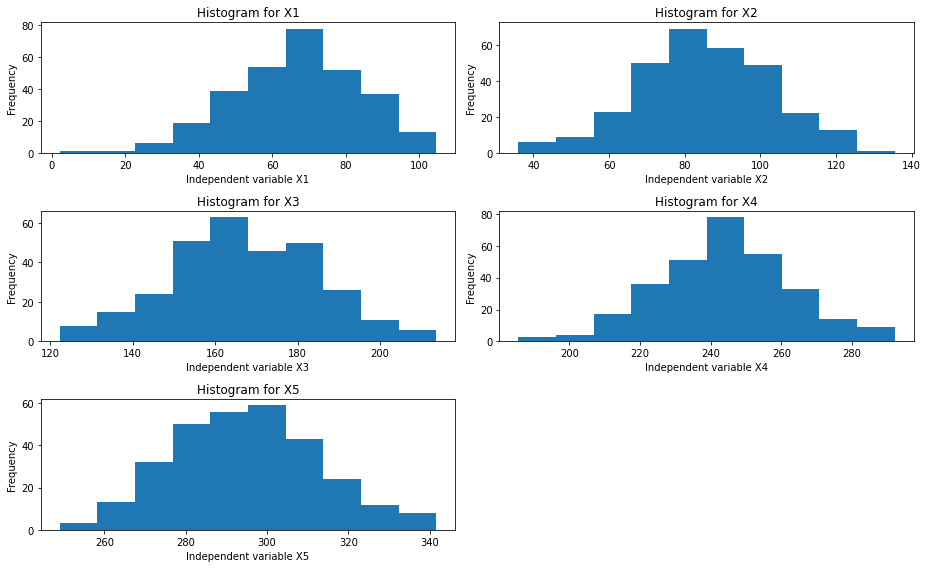

In [24]:
basic_statistics(df, mean=True, variance=True, histogram=True)

BOX PLOT


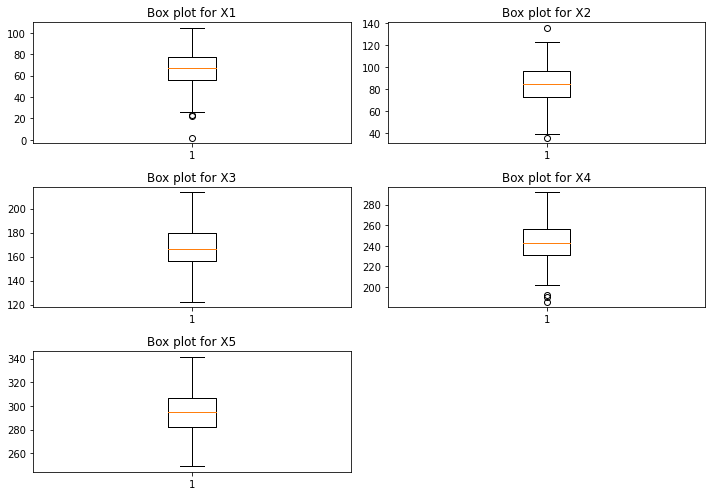

BOX PLOT AFTER REMOVING OUTLIERS


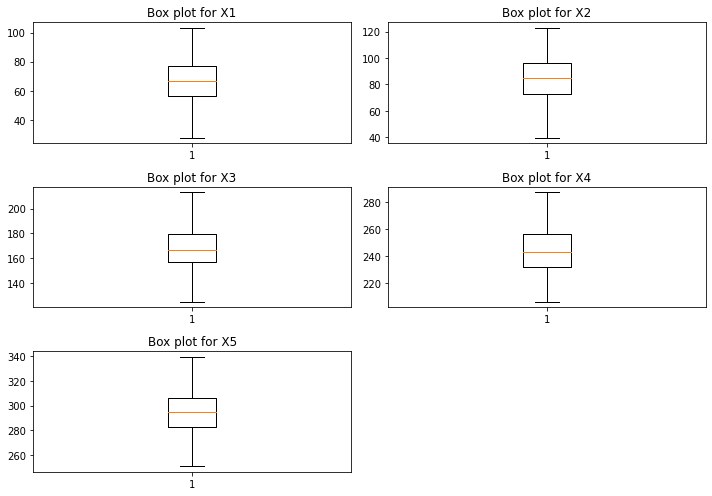

In [25]:
print("BOX PLOT")
boxplot = plot_boxplot(df)
df = remove_outliers(boxplot=boxplot, data=df)

print("BOX PLOT AFTER REMOVING OUTLIERS")
boxplot = plot_boxplot(df)

          X1        X2        X3        X4        X5         Y
X1  1.000000  0.047110 -0.023789 -0.082386 -0.061232  0.950138
X2  0.047110  1.000000  0.014037  0.046273  0.043521  0.118592
X3 -0.023789  0.014037  1.000000  0.036237  0.055953  0.089594
X4 -0.082386  0.046273  0.036237  1.000000  0.128780  0.084423
X5 -0.061232  0.043521  0.055953  0.128780  1.000000  0.155129
Y   0.950138  0.118592  0.089594  0.084423  0.155129  1.000000


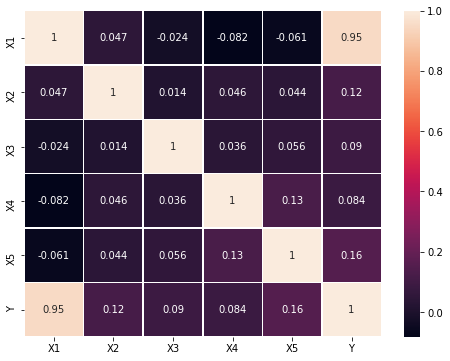

In [34]:
plot_corr_matrix(df)

Task 2: simple linear regression

In [ ]:
print('******************RUNNING TASK 2**************************\n\n')

******************RUNNING TASK 1**************************



In [95]:
X = df['X1']
y = df['Y']
(simple_model, y_predict) = linear_regression(X, y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     2609.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          3.09e-144
Time:                        21:36:38   Log-Likelihood:                -2011.6
No. Observations:                 283   AIC:                             4027.
Df Residuals:                     281   BIC:                             4035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3756.9803     77.211     48.658      0.0

In [97]:
residuals = simple_model.resid
variance = np.var(residuals)
print(f'variance: {variance}')

variance: 87429.31822333616


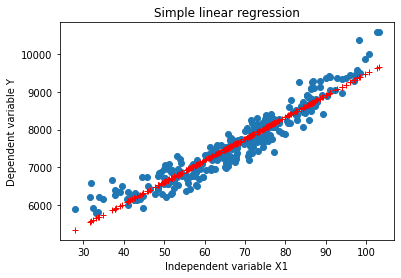

In [48]:
plot_model(X, y, y_predict)

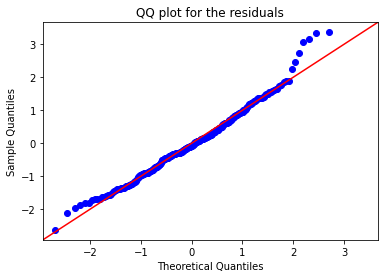

In [53]:
plot_qq_plot(residuals)

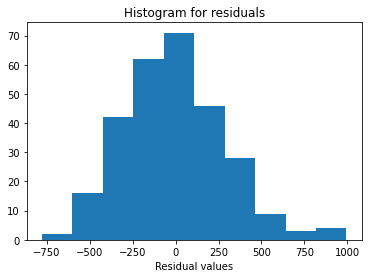

In [56]:
plot_histogram(residuals)

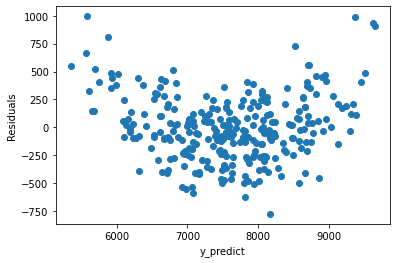

In [68]:
plot_scatter_plot(residuals, y_predict)

In [72]:
chi_square_test(residuals)

Chi-square test
pvalue: 0.0012300380780962553
Null hypothesis rejected.
Residuals do not follow a normal distribution


In [98]:
df_poly = pd.DataFrame(columns=['X1', 'X1^2'])
df_poly['X1'] = df['X1']
df_poly['X1^2'] = df['X1']**2
y = df['Y']
(polynomial_model, y_predict) = linear_regression(df_poly, y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1895.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          1.79e-163
Time:                        21:39:45   Log-Likelihood:                -1962.7
No. Observations:                 283   AIC:                             3931.
Df Residuals:                     280   BIC:                             3942.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5922.8964    211.526     28.001      0.0

In [99]:
residuals = polynomial_model.resid
variance = np.var(residuals)
print(f'variance: {variance}')

variance: 61849.786332184245


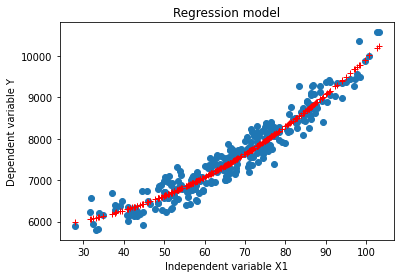

In [78]:
plot_model(df['X1'], y, y_predict)

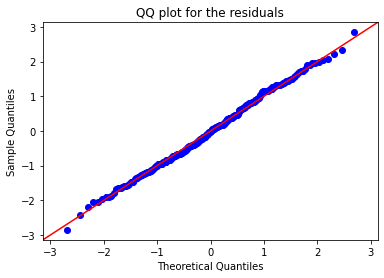

In [79]:
plot_qq_plot(residuals)

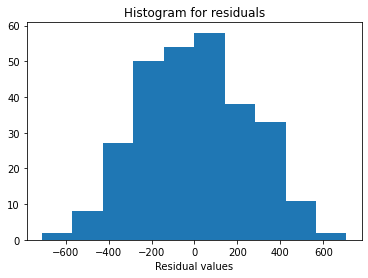

In [80]:
plot_histogram(residuals)

In [81]:
chi_square_test(polynomial_model.resid)

Chi-square test
pvalue: 0.37123993006834366
Null hypothesis accepted.
Residuals follow a normal distribution


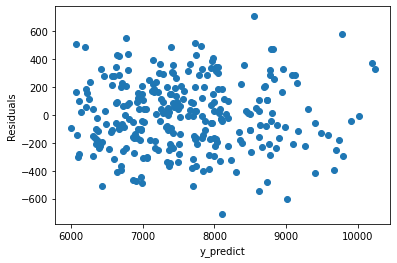

In [83]:
plot_scatter_plot(residuals, y_predict)

Task 3: multi-variable regression

In [ ]:
print('******************RUNNING TASK 3**************************\n\n')

******************RUNNING TASK 1**************************



In [100]:
(multivariable_model,y_predict) = linear_regression(df[['X1','X2','X3','X4','X5']], df['Y'])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2718.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          5.11e-233
Time:                        21:41:14   Log-Likelihood:                -1787.7
No. Observations:                 283   AIC:                             3587.
Df Residuals:                     277   BIC:                             3609.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2303.1764    188.943    -12.190      0.0

In [101]:
residuals = multivariable_model.resid
variance = np.var(residuals)
print(f'variance: {variance}')

variance: 17962.92575996309


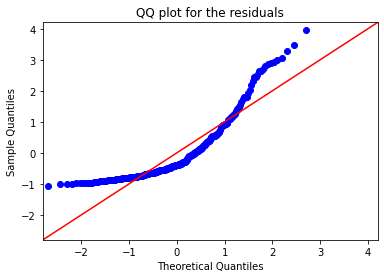

In [91]:
plot_qq_plot(residuals)

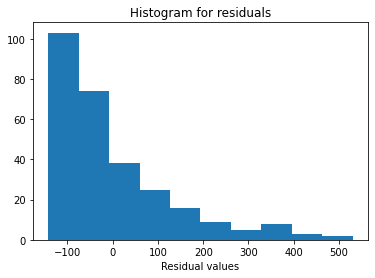

In [92]:
plot_histogram(residuals)

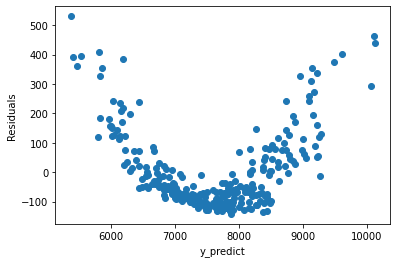

In [93]:
plot_scatter_plot(residuals, y_predict)

In [94]:
chi_square_test(residuals)

Chi-square test
pvalue: 1.8286160456403715e-19
Null hypothesis rejected.
Residuals do not follow a normal distribution


In [102]:
multivariable_model, y_predict = linear_regression(df[['X1', 'X2', 'X5']], df['Y'])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1866.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          2.97e-184
Time:                        21:41:29   Log-Likelihood:                -1910.2
No. Observations:                 283   AIC:                             3828.
Df Residuals:                     279   BIC:                             3843.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8384    226.229      0.030      0.9

In [103]:
residuals = multivariable_model.resid
variance = np.var(residuals)
print(f'variance: {variance}')

variance: 42678.57926259512


In [106]:
model, y_predict = linear_regression(df[['X1', 'X2', 'X5']], df['Y'], constant=False)

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.281e+05
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                        0.00
Time:                        21:49:49   Log-Likelihood:                         -1910.2
No. Observations:                 283   AIC:                                      3826.
Df Residuals:                     280   BIC:                                      3837.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [107]:
residuals = multivariable_model.resid
variance = np.var(residuals)
print(f'variance: {variance}')

variance: 42678.57926259512


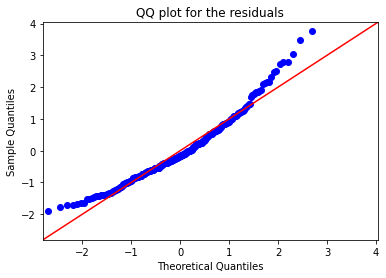

In [109]:
plot_qq_plot(residuals)

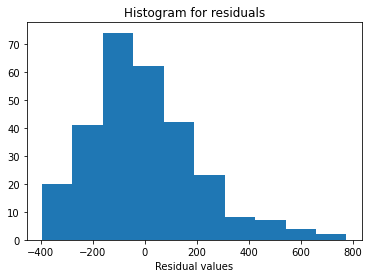

In [110]:
plot_histogram(residuals)

In [112]:
chi_square_test(residuals)

Chi-square test
pvalue: 2.6812920785170595e-08
Null hypothesis rejected.
Residuals do not follow a normal distribution


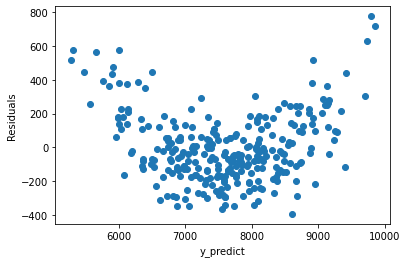

In [111]:
plot_scatter_plot(residuals, y_predict)